In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import os

In [162]:
df_train=pd.read_csv("./Dataset/liar_plus_train.csv")

In [163]:
df_train.tail()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
10236,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",They compounded their error by combining full ...
10237,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,"Romney said that ""Obamacare means that for up..."
10238,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,But that it leaves out important details and t...
10239,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,"We checked the research and, quite frankly, fi..."
10240,1155.json,pants-fire,The Department of Veterans Affairs has a manua...,"health-care,veterans",michael-steele,chairman of the Republican National Committee,Maryland,republican,0.0,1.0,1.0,0.0,2.0,a Fox News interview,"Krueger said that ""since the Affordable Care A..."


In [90]:
df_train.shape

(10241, 15)

In [91]:
df_test=pd.read_csv("Dataset/liar_plus_test.csv")

df_test.shape

(1267, 15)

In [92]:
df_test.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"Meantime, engineering experts agree the wall w..."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he..."
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"But spending still goes up. In addition, many ..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,Our rating A Democratic Party web video making...


In [93]:
df_valid=pd.read_csv("./Dataset/liar_plus_valid.csv")

df_valid.shape

(1284, 15)

In [134]:
df_valid.tail()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
1279,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70,71,160,163,9,a press conference,"In 2009, 17 percent of the U. S. 's oil import..."
1280,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,a speech on the economy,"Clinton said, Trump has ""bankrupted his compan..."
1281,401.json,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0,1,0,2,0,a television ad,"""I don't think that there should be a mandate ..."
1282,1055.json,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1,4,4,1,0,an Internet ad.,But the poll doesn't say that. Several days af...
1283,9117.json,barely-true,No one claims the report vindicating New Jerse...,"candidates-biography,infrastructure",rudy-giuliani,Attorney,New York,republican,9,11,10,7,3,"comments on NBC's ""Meet the Press""","Giuliani said ""no one"" called the Mastro repor..."


In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10239 non-null  object 
 1   label                    10239 non-null  object 
 2   statement                10239 non-null  object 
 3   subject                  10237 non-null  object 
 4   speaker                  10237 non-null  object 
 5   speaker_job              7342 non-null   object 
 6   state_info               8031 non-null   object 
 7   party_affiliation        10237 non-null  object 
 8   barely_true_counts       10237 non-null  float64
 9   false_counts             10237 non-null  float64
 10  half_true_counts         10237 non-null  float64
 11  mostly_true_counts       10237 non-null  float64
 12  pants_on_fire_counts     10237 non-null  float64
 13  context                  10137 non-null  object 
 14  extracted_justificatio

In [96]:
df_train.describe(include="all")

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
count,10239,10239,10239,10237,10237,7342,8031,10237,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000,10137,10153
unique,10239,6,10222,3827,2909,1184,84,23,NaN,NaN,NaN,NaN,NaN,4345,10144
top,2788.json,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,President,Texas,republican,NaN,NaN,NaN,NaN,NaN,a news release,(Get updates from PolitiFactRI on Twitter.
freq,1,2114,3,381,488,492,1008,4496,NaN,NaN,NaN,NaN,NaN,241,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.534336,13.287682,17.135391,16.435870,6.202012,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.974349,24.113808,35.847862,36.153089,16.129599,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,13.000000,11.000000,5.000000,NaN,NaN


In [97]:
df_train.isnull().values.any()

True

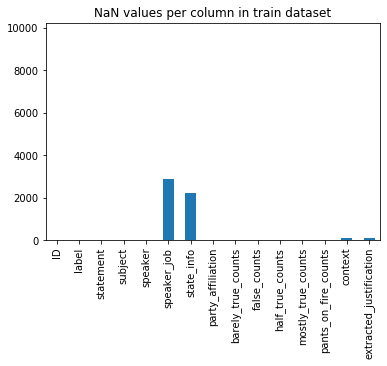

In [98]:
df_train.isnull().sum().plot(kind='bar', ylim=(0, len(df_train)), title='NaN values per column in train dataset')

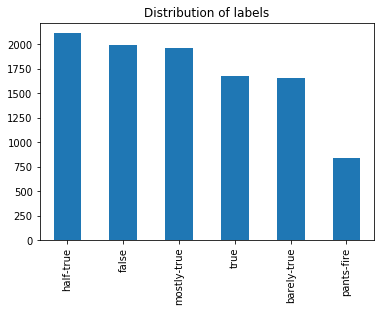

In [99]:
df_train['label'].value_counts().plot(kind='bar', title='Distribution of labels')

In [100]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [101]:
from sklearn.model_selection import train_test_split, cross_val_score
from nltk.corpus import stopwords

In [102]:
df_train.columns

Index(['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job',
       'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
       'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
       'context', 'extracted_justification'],
      dtype='object')

In [103]:
df_train=df_train.drop(columns=['ID','speaker_job','state_info'])

In [104]:
df_train.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
0,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
2,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
3,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


In [105]:
#labels = {'train':[df_train[i][1] for i in range(len(df_train))], 'test':[df_test[i][1] for i in range(len(df_test))], 'val':[df_valid[i][1] for i in range(len(df_valid))]}

In [106]:
#labels['train']

In [107]:
#statements = {'train':[df_train[i][2] for i in range(len(df_train))], 'test':[df_test[i][2] for i in range(len(df_test))], 'val':[df_valid[i][2] for i in range(len(df_valid))]}

In [108]:
#print(statements)

In [109]:
#subjects = {'train':[df_train[i][3] for i in range(len(df_train))], 'test':[df_test[i][3] for i in range(len(df_test))], 'val':[df_valid[i][3] for i in range(len(df_valid))]}
#speaker = {'train':[df_train[i][4] for i in range(len(df_train))], 'test':[df_test[i][4] for i in range(len(df_test))], 'val':[df_valid[i][4] for i in range(len(df_valid))]}
#job = {'train':[df_train[i][5] for i in range(len(df_train))], 'test':[df_test[i][5] for i in range(len(df_test))], 'val':[df_valid[i][5] for i in range(len(df_valid))]}
#state = {'train':[df_train[i][6] for i in range(len(df_train))], 'test':[df_test[i][6] for i in range(len(df_test))], 'val':[df_valid[i][6] for i in range(len(df_valid))]}
#affiliation = {'train':[df_train[i][7] for i in range(len(df_train))], 'test':[df_test[i][7] for i in range(len(df_test))], 'val':[df_valid[i][7] for i in range(len(df_valid))]}
#credit = {'train':[df_train[i][8:13] for i in range(len(df_train))], 'test':[df_test[i][8:13] for i in range(len(df_test))], 'val':[df_valid[i][8:13] for i in range(len(df_valid))]}
#context = {'train':[df_train[i][13] for i in range(len(df_train))], 'test':[df_test[i][13] for i in range(len(df_test))], 'val':[df_valid[i][13] for i in range(len(df_valid))]}
#justification = {'train':[df_train[i][14] for i in range(len(df_train))], 'test':[df_test[i][14] for i in range(len(df_test))], 'val':[df_valid[i][14] for i in range(len(df_valid))]}


In [61]:
df=df_train
df["statement"]

0        When did the decline of coal start? It started...
1        Hillary Clinton agrees with John McCain "by vo...
2        Health care reform legislation is likely to ma...
3        The economic turnaround started at the end of ...
4        The Chicago Bears have had more starting quart...
                               ...                        
10236    There are a larger number of shark attacks in ...
10237    Democrats have now become the party of the [At...
10238    Says an alternative to Social Security that op...
10239    On lifting the U.S. Cuban embargo and allowing...
10240    The Department of Veterans Affairs has a manua...
Name: statement, Length: 10241, dtype: object

In [62]:
import string
punctuation = string.punctuation

In [63]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.corpus import sentiwordnet as swn
english_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [64]:
import re

In [65]:
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')

In [66]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [67]:

english_stopwords=set(stopwords.words("english"))

In [68]:
additional_words={'com','http','www','stori','wa','hi','ha','pleas','not'}

In [69]:
total_stopwords=english_stopwords.union(additional_words)

In [70]:
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

In [86]:
#Text Cleaning Functions
def remove_punc(row):
    tokenizer=RegexpTokenizer('[a-zA-Z]+')
    print(type(row))
    tokens=tokenizer.tokenize(row)
    row=row.lower()
    tokens=row.split() 
    new_tokens=[w for w in tokens if w.isalpha()]
    new_tokens=[w for w in new_tokens if w not in punctuation]
    return new_tokens

In [73]:
type(df["statement"][0])

str

In [74]:
tokenizer=RegexpTokenizer('[a-zA-Z]+')

In [75]:
tokens=tokenizer.tokenize(df["statement"][0])

In [76]:
tokens

['When',
 'did',
 'the',
 'decline',
 'of',
 'coal',
 'start',
 'It',
 'started',
 'when',
 'natural',
 'gas',
 'took',
 'off',
 'that',
 'started',
 'to',
 'begin',
 'in',
 'President',
 'George',
 'W',
 'Bushs',
 'administration']

In [77]:
row=df["statement"][0].lower()

In [78]:
print(row)

when did the decline of coal start? it started when natural gas took off that started to begin in (president george w.) bushs administration.


In [79]:
tokens=row.split()
print(tokens)

['when', 'did', 'the', 'decline', 'of', 'coal', 'start?', 'it', 'started', 'when', 'natural', 'gas', 'took', 'off', 'that', 'started', 'to', 'begin', 'in', '(president', 'george', 'w.)', 'bushs', 'administration.']


In [80]:
new_tokens=[w for w in tokens if w.isalpha()]

In [81]:
new_tokens

['when',
 'did',
 'the',
 'decline',
 'of',
 'coal',
 'it',
 'started',
 'when',
 'natural',
 'gas',
 'took',
 'off',
 'that',
 'started',
 'to',
 'begin',
 'in',
 'george',
 'bushs']

In [82]:
new_tokens=[w for w in new_tokens if w not in punctuation]
print(new_tokens)

['when', 'did', 'the', 'decline', 'of', 'coal', 'it', 'started', 'when', 'natural', 'gas', 'took', 'off', 'that', 'started', 'to', 'begin', 'in', 'george', 'bushs']


In [188]:
d1=df_train

In [189]:
d1["statement"]=d1.statement.apply(remove_punc)


In [112]:
df_train["statement"]

0        When did the decline of coal start? It started...
1        Hillary Clinton agrees with John McCain "by vo...
2        Health care reform legislation is likely to ma...
3        The economic turnaround started at the end of ...
4        The Chicago Bears have had more starting quart...
                               ...                        
10236    There are a larger number of shark attacks in ...
10237    Democrats have now become the party of the [At...
10238    Says an alternative to Social Security that op...
10239    On lifting the U.S. Cuban embargo and allowing...
10240    The Department of Veterans Affairs has a manua...
Name: statement, Length: 10241, dtype: object

In [113]:
for i in range(1,10241):
    print(i)
    df_train["statement"][i]=remove_punc(df_train["statement"][i])
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/home/himansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
df_train.head()

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:

def proc(row):
   
    return text

In [ ]:

df_train["new_statements"]=df_train.new_statements.apply(proc)

In [ ]:
df_train.head()

In [64]:
print('Indexing word vectors.')

embeddings_index = {}
with open('glove6b50dtxt/glove.6B.50d.txt',encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        # each word would have a vector of 50 dim
print('Found %s word vectors.' % len(embeddings_index))


Indexing word vectors.
Found 400000 word vectors.


In [65]:
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from collections import Counter
from nltk.corpus import stopwords

MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
NUM_FILTERS = 50
WINDOW_SIZE = 8


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
# Train
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(statements['train'])
sequences_train = tokenizer.texts_to_sequences(statements['train'])
word_index = tokenizer.word_index
print('Found %s unique tokens in Train.' % len(word_index))
data_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of Train data tensor:', data_train.shape)



NameError: name 'statements' is not defined

In [ ]:
word_index

In [ ]:
data_train

In [ ]:
data_train.shape

In [138]:
for 
    

1 ihihihihi
2 ihihihihi
3 ihihihihi
4 ihihihihi
5 ihihihihi
6 ihihihihi
7 ihihihihi
8 ihihihihi
9 ihihihihi
10 ihihihihi
11 ihihihihi
12 ihihihihi
13 ihihihihi
14 ihihihihi
15 ihihihihi
16 ihihihihi
17 ihihihihi
18 ihihihihi
19 ihihihihi
20 ihihihihi
21 ihihihihi
22 ihihihihi
23 ihihihihi
24 ihihihihi
25 ihihihihi
26 ihihihihi
27 ihihihihi
28 ihihihihi
29 ihihihihi
30 ihihihihi
31 ihihihihi
32 ihihihihi
33 ihihihihi
34 ihihihihi
35 ihihihihi
36 ihihihihi
37 ihihihihi
38 ihihihihi
39 ihihihihi
40 ihihihihi
41 ihihihihi
42 ihihihihi
43 ihihihihi
44 ihihihihi
45 ihihihihi
46 ihihihihi
47 ihihihihi
48 ihihihihi
49 ihihihihi
50 ihihihihi
51 ihihihihi
52 ihihihihi
53 ihihihihi
54 ihihihihi
55 ihihihihi
56 ihihihihi
57 ihihihihi
58 ihihihihi
59 ihihihihi
60 ihihihihi
61 ihihihihi
62 ihihihihi
63 ihihihihi
64 ihihihihi
65 ihihihihi
66 ihihihihi
67 ihihihihi
68 ihihihihi
69 ihihihihi
70 ihihihihi
71 ihihihihi
72 ihihihihi
73 ihihihihi
74 ihihihihi
75 ihihihihi
76 ihihihihi
77 ihihihihi
78 ihihi

678 ihihihihi
679 ihihihihi
680 ihihihihi
681 ihihihihi
682 ihihihihi
683 ihihihihi
684 ihihihihi
685 ihihihihi
686 ihihihihi
687 ihihihihi
688 ihihihihi
689 ihihihihi
690 ihihihihi
691 ihihihihi
692 ihihihihi
693 ihihihihi
694 ihihihihi
695 ihihihihi
696 ihihihihi
697 ihihihihi
698 ihihihihi
699 ihihihihi
700 ihihihihi
701 ihihihihi
702 ihihihihi
703 ihihihihi
704 ihihihihi
705 ihihihihi
706 ihihihihi
707 ihihihihi
708 ihihihihi
709 ihihihihi
710 ihihihihi
711 ihihihihi
712 ihihihihi
713 ihihihihi
714 ihihihihi
715 ihihihihi
716 ihihihihi
717 ihihihihi
718 ihihihihi
719 ihihihihi
720 ihihihihi
721 ihihihihi
722 ihihihihi
723 ihihihihi
724 ihihihihi
725 ihihihihi
726 ihihihihi
727 ihihihihi
728 ihihihihi
729 ihihihihi
730 ihihihihi
731 ihihihihi
732 ihihihihi
733 ihihihihi
734 ihihihihi
735 ihihihihi
736 ihihihihi
737 ihihihihi
738 ihihihihi
739 ihihihihi
740 ihihihihi
741 ihihihihi
742 ihihihihi
743 ihihihihi
744 ihihihihi
745 ihihihihi
746 ihihihihi
747 ihihihihi
748 ihihihihi
749 ih

2089 ihihihihi
2090 ihihihihi
2091 ihihihihi
2092 ihihihihi
2093 ihihihihi
2094 ihihihihi
2095 ihihihihi
2096 ihihihihi
2097 ihihihihi
2098 ihihihihi
2099 ihihihihi
2100 ihihihihi
2101 ihihihihi
2102 ihihihihi
2103 ihihihihi
2104 ihihihihi
2105 ihihihihi
2106 ihihihihi
2107 ihihihihi
2108 ihihihihi
2109 ihihihihi
2110 ihihihihi
2111 ihihihihi
2112 ihihihihi
2113 ihihihihi
2114 ihihihihi
2115 ihihihihi
2116 ihihihihi
2117 ihihihihi
2118 ihihihihi
2119 ihihihihi
2120 ihihihihi
2121 ihihihihi
2122 ihihihihi
2123 ihihihihi
2124 ihihihihi
2125 ihihihihi
2126 ihihihihi
2127 ihihihihi
2128 ihihihihi
2129 ihihihihi
2130 ihihihihi
2131 ihihihihi
2132 ihihihihi
2133 ihihihihi
2134 ihihihihi
2135 ihihihihi
2136 ihihihihi
2137 ihihihihi
2138 ihihihihi
2139 ihihihihi
2140 ihihihihi
2141 ihihihihi
2142 ihihihihi
2144 ihihihihi
2145 ihihihihi
2146 ihihihihi
2147 ihihihihi
2148 ihihihihi
2149 ihihihihi
2150 ihihihihi
2151 ihihihihi
2152 ihihihihi
2153 ihihihihi
2154 ihihihihi
2155 ihihihihi
2156 ihihi

2679 ihihihihi
2680 ihihihihi
2681 ihihihihi
2682 ihihihihi
2683 ihihihihi
2684 ihihihihi
2685 ihihihihi
2686 ihihihihi
2687 ihihihihi
2688 ihihihihi
2689 ihihihihi
2690 ihihihihi
2691 ihihihihi
2692 ihihihihi
2693 ihihihihi
2694 ihihihihi
2695 ihihihihi
2696 ihihihihi
2697 ihihihihi
2698 ihihihihi
2699 ihihihihi
2700 ihihihihi
2701 ihihihihi
2702 ihihihihi
2703 ihihihihi
2704 ihihihihi
2705 ihihihihi
2706 ihihihihi
2707 ihihihihi
2708 ihihihihi
2709 ihihihihi
2710 ihihihihi
2711 ihihihihi
2712 ihihihihi
2713 ihihihihi
2714 ihihihihi
2715 ihihihihi
2716 ihihihihi
2717 ihihihihi
2718 ihihihihi
2719 ihihihihi
2720 ihihihihi
2721 ihihihihi
2722 ihihihihi
2723 ihihihihi
2724 ihihihihi
2725 ihihihihi
2726 ihihihihi
2727 ihihihihi
2728 ihihihihi
2729 ihihihihi
2730 ihihihihi
2731 ihihihihi
2732 ihihihihi
2733 ihihihihi
2734 ihihihihi
2735 ihihihihi
2736 ihihihihi
2737 ihihihihi
2738 ihihihihi
2739 ihihihihi
2740 ihihihihi
2741 ihihihihi
2742 ihihihihi
2743 ihihihihi
2744 ihihihihi
2745 ihihi

4056 ihihihihi
4057 ihihihihi
4058 ihihihihi
4059 ihihihihi
4060 ihihihihi
4061 ihihihihi
4062 ihihihihi
4063 ihihihihi
4064 ihihihihi
4065 ihihihihi
4066 ihihihihi
4067 ihihihihi
4068 ihihihihi
4069 ihihihihi
4070 ihihihihi
4071 ihihihihi
4072 ihihihihi
4073 ihihihihi
4074 ihihihihi
4075 ihihihihi
4076 ihihihihi
4077 ihihihihi
4078 ihihihihi
4079 ihihihihi
4080 ihihihihi
4081 ihihihihi
4082 ihihihihi
4083 ihihihihi
4084 ihihihihi
4085 ihihihihi
4086 ihihihihi
4087 ihihihihi
4088 ihihihihi
4089 ihihihihi
4090 ihihihihi
4091 ihihihihi
4092 ihihihihi
4093 ihihihihi
4094 ihihihihi
4095 ihihihihi
4096 ihihihihi
4097 ihihihihi
4098 ihihihihi
4099 ihihihihi
4100 ihihihihi
4101 ihihihihi
4102 ihihihihi
4103 ihihihihi
4104 ihihihihi
4105 ihihihihi
4106 ihihihihi
4107 ihihihihi
4108 ihihihihi
4109 ihihihihi
4110 ihihihihi
4111 ihihihihi
4112 ihihihihi
4113 ihihihihi
4114 ihihihihi
4115 ihihihihi
4116 ihihihihi
4117 ihihihihi
4118 ihihihihi
4119 ihihihihi
4120 ihihihihi
4121 ihihihihi
4122 ihihi

4928 ihihihihi
4929 ihihihihi
4930 ihihihihi
4931 ihihihihi
4932 ihihihihi
4933 ihihihihi
4934 ihihihihi
4935 ihihihihi
4936 ihihihihi
4937 ihihihihi
4938 ihihihihi
4939 ihihihihi
4940 ihihihihi
4941 ihihihihi
4942 ihihihihi
4943 ihihihihi
4944 ihihihihi
4945 ihihihihi
4946 ihihihihi
4947 ihihihihi
4948 ihihihihi
4949 ihihihihi
4950 ihihihihi
4951 ihihihihi
4952 ihihihihi
4953 ihihihihi
4954 ihihihihi
4955 ihihihihi
4956 ihihihihi
4957 ihihihihi
4958 ihihihihi
4959 ihihihihi
4960 ihihihihi
4961 ihihihihi
4962 ihihihihi
4963 ihihihihi
4964 ihihihihi
4965 ihihihihi
4966 ihihihihi
4967 ihihihihi
4968 ihihihihi
4969 ihihihihi
4970 ihihihihi
4971 ihihihihi
4972 ihihihihi
4973 ihihihihi
4974 ihihihihi
4975 ihihihihi
4976 ihihihihi
4977 ihihihihi
4978 ihihihihi
4979 ihihihihi
4980 ihihihihi
4981 ihihihihi
4982 ihihihihi
4983 ihihihihi
4984 ihihihihi
4985 ihihihihi
4986 ihihihihi
4987 ihihihihi
4988 ihihihihi
4989 ihihihihi
4990 ihihihihi
4991 ihihihihi
4992 ihihihihi
4993 ihihihihi
4994 ihihi

5678 ihihihihi
5679 ihihihihi
5680 ihihihihi
5681 ihihihihi
5682 ihihihihi
5683 ihihihihi
5684 ihihihihi
5685 ihihihihi
5686 ihihihihi
5687 ihihihihi
5688 ihihihihi
5689 ihihihihi
5690 ihihihihi
5691 ihihihihi
5692 ihihihihi
5693 ihihihihi
5694 ihihihihi
5695 ihihihihi
5696 ihihihihi
5697 ihihihihi
5698 ihihihihi
5699 ihihihihi
5700 ihihihihi
5701 ihihihihi
5702 ihihihihi
5703 ihihihihi
5704 ihihihihi
5705 ihihihihi
5706 ihihihihi
5707 ihihihihi
5708 ihihihihi
5709 ihihihihi
5710 ihihihihi
5711 ihihihihi
5712 ihihihihi
5713 ihihihihi
5714 ihihihihi
5715 ihihihihi
5716 ihihihihi
5717 ihihihihi
5718 ihihihihi
5719 ihihihihi
5720 ihihihihi
5721 ihihihihi
5722 ihihihihi
5723 ihihihihi
5724 ihihihihi
5725 ihihihihi
5726 ihihihihi
5727 ihihihihi
5728 ihihihihi
5729 ihihihihi
5730 ihihihihi
5731 ihihihihi
5732 ihihihihi
5733 ihihihihi
5734 ihihihihi
5735 ihihihihi
5736 ihihihihi
5737 ihihihihi
5738 ihihihihi
5739 ihihihihi
5740 ihihihihi
5741 ihihihihi
5742 ihihihihi
5743 ihihihihi
5744 ihihi

6229 ihihihihi
6230 ihihihihi
6231 ihihihihi
6232 ihihihihi
6233 ihihihihi
6234 ihihihihi
6235 ihihihihi
6236 ihihihihi
6237 ihihihihi
6238 ihihihihi
6239 ihihihihi
6240 ihihihihi
6241 ihihihihi
6242 ihihihihi
6243 ihihihihi
6244 ihihihihi
6245 ihihihihi
6246 ihihihihi
6247 ihihihihi
6248 ihihihihi
6249 ihihihihi
6250 ihihihihi
6251 ihihihihi
6252 ihihihihi
6253 ihihihihi
6254 ihihihihi
6255 ihihihihi
6256 ihihihihi
6257 ihihihihi
6258 ihihihihi
6259 ihihihihi
6260 ihihihihi
6261 ihihihihi
6262 ihihihihi
6263 ihihihihi
6264 ihihihihi
6265 ihihihihi
6266 ihihihihi
6267 ihihihihi
6268 ihihihihi
6269 ihihihihi
6270 ihihihihi
6271 ihihihihi
6272 ihihihihi
6273 ihihihihi
6274 ihihihihi
6275 ihihihihi
6276 ihihihihi
6277 ihihihihi
6278 ihihihihi
6279 ihihihihi
6280 ihihihihi
6281 ihihihihi
6282 ihihihihi
6283 ihihihihi
6284 ihihihihi
6285 ihihihihi
6286 ihihihihi
6287 ihihihihi
6288 ihihihihi
6289 ihihihihi
6290 ihihihihi
6291 ihihihihi
6292 ihihihihi
6293 ihihihihi
6294 ihihihihi
6295 ihihi

7418 ihihihihi
7419 ihihihihi
7420 ihihihihi
7421 ihihihihi
7422 ihihihihi
7423 ihihihihi
7424 ihihihihi
7425 ihihihihi
7426 ihihihihi
7427 ihihihihi
7428 ihihihihi
7429 ihihihihi
7430 ihihihihi
7431 ihihihihi
7432 ihihihihi
7433 ihihihihi
7434 ihihihihi
7435 ihihihihi
7436 ihihihihi
7437 ihihihihi
7438 ihihihihi
7439 ihihihihi
7440 ihihihihi
7441 ihihihihi
7442 ihihihihi
7443 ihihihihi
7444 ihihihihi
7445 ihihihihi
7446 ihihihihi
7447 ihihihihi
7448 ihihihihi
7449 ihihihihi
7450 ihihihihi
7451 ihihihihi
7452 ihihihihi
7453 ihihihihi
7454 ihihihihi
7455 ihihihihi
7456 ihihihihi
7457 ihihihihi
7458 ihihihihi
7459 ihihihihi
7460 ihihihihi
7461 ihihihihi
7462 ihihihihi
7463 ihihihihi
7464 ihihihihi
7465 ihihihihi
7466 ihihihihi
7467 ihihihihi
7468 ihihihihi
7469 ihihihihi
7470 ihihihihi
7471 ihihihihi
7472 ihihihihi
7473 ihihihihi
7474 ihihihihi
7475 ihihihihi
7476 ihihihihi
7477 ihihihihi
7478 ihihihihi
7479 ihihihihi
7480 ihihihihi
7481 ihihihihi
7482 ihihihihi
7483 ihihihihi
7484 ihihi

8335 ihihihihi
8336 ihihihihi
8337 ihihihihi
8338 ihihihihi
8339 ihihihihi
8340 ihihihihi
8341 ihihihihi
8342 ihihihihi
8343 ihihihihi
8344 ihihihihi
8345 ihihihihi
8346 ihihihihi
8347 ihihihihi
8348 ihihihihi
8349 ihihihihi
8350 ihihihihi
8351 ihihihihi
8352 ihihihihi
8353 ihihihihi
8354 ihihihihi
8355 ihihihihi
8356 ihihihihi
8357 ihihihihi
8358 ihihihihi
8359 ihihihihi
8360 ihihihihi
8361 ihihihihi
8362 ihihihihi
8363 ihihihihi
8364 ihihihihi
8365 ihihihihi
8366 ihihihihi
8367 ihihihihi
8368 ihihihihi
8369 ihihihihi
8370 ihihihihi
8371 ihihihihi
8372 ihihihihi
8373 ihihihihi
8374 ihihihihi
8375 ihihihihi
8376 ihihihihi
8377 ihihihihi
8378 ihihihihi
8379 ihihihihi
8380 ihihihihi
8381 ihihihihi
8382 ihihihihi
8383 ihihihihi
8384 ihihihihi
8385 ihihihihi
8386 ihihihihi
8387 ihihihihi
8388 ihihihihi
8389 ihihihihi
8390 ihihihihi
8391 ihihihihi
8392 ihihihihi
8393 ihihihihi
8394 ihihihihi
8395 ihihihihi
8396 ihihihihi
8397 ihihihihi
8398 ihihihihi
8399 ihihihihi
8400 ihihihihi
8401 ihihi

8908 ihihihihi
8909 ihihihihi
8910 ihihihihi
8911 ihihihihi
8912 ihihihihi
8913 ihihihihi
8914 ihihihihi
8915 ihihihihi
8916 ihihihihi
8917 ihihihihi
8918 ihihihihi
8919 ihihihihi
8920 ihihihihi
8921 ihihihihi
8922 ihihihihi
8923 ihihihihi
8924 ihihihihi
8925 ihihihihi
8926 ihihihihi
8927 ihihihihi
8928 ihihihihi
8929 ihihihihi
8930 ihihihihi
8931 ihihihihi
8932 ihihihihi
8933 ihihihihi
8934 ihihihihi
8935 ihihihihi
8936 ihihihihi
8937 ihihihihi
8938 ihihihihi
8939 ihihihihi
8940 ihihihihi
8941 ihihihihi
8942 ihihihihi
8943 ihihihihi
8944 ihihihihi
8945 ihihihihi
8946 ihihihihi
8947 ihihihihi
8948 ihihihihi
8949 ihihihihi
8950 ihihihihi
8951 ihihihihi
8952 ihihihihi
8953 ihihihihi
8954 ihihihihi
8955 ihihihihi
8956 ihihihihi
8957 ihihihihi
8958 ihihihihi
8959 ihihihihi
8960 ihihihihi
8961 ihihihihi
8962 ihihihihi
8963 ihihihihi
8964 ihihihihi
8965 ihihihihi
8966 ihihihihi
8967 ihihihihi
8968 ihihihihi
8969 ihihihihi
8970 ihihihihi
8971 ihihihihi
8972 ihihihihi
8973 ihihihihi
8974 ihihi

9826 ihihihihi
9827 ihihihihi
9828 ihihihihi
9829 ihihihihi
9830 ihihihihi
9831 ihihihihi
9832 ihihihihi
9833 ihihihihi
9834 ihihihihi
9835 ihihihihi
9836 ihihihihi
9837 ihihihihi
9838 ihihihihi
9839 ihihihihi
9840 ihihihihi
9841 ihihihihi
9842 ihihihihi
9843 ihihihihi
9844 ihihihihi
9845 ihihihihi
9846 ihihihihi
9847 ihihihihi
9848 ihihihihi
9849 ihihihihi
9850 ihihihihi
9851 ihihihihi
9852 ihihihihi
9853 ihihihihi
9854 ihihihihi
9855 ihihihihi
9856 ihihihihi
9857 ihihihihi
9858 ihihihihi
9859 ihihihihi
9860 ihihihihi
9861 ihihihihi
9862 ihihihihi
9863 ihihihihi
9864 ihihihihi
9865 ihihihihi
9866 ihihihihi
9867 ihihihihi
9868 ihihihihi
9869 ihihihihi
9870 ihihihihi
9871 ihihihihi
9872 ihihihihi
9873 ihihihihi
9874 ihihihihi
9875 ihihihihi
9876 ihihihihi
9877 ihihihihi
9878 ihihihihi
9879 ihihihihi
9880 ihihihihi
9881 ihihihihi
9882 ihihihihi
9883 ihihihihi
9884 ihihihihi
9885 ihihihihi
9886 ihihihihi
9887 ihihihihi
9888 ihihihihi
9889 ihihihihi
9890 ihihihihi
9891 ihihihihi
9892 ihihi

In [127]:
for i in range(10241):
    if(df_train["statement"][i]==float("NaN")):
        print("him")
    

In [160]:

nan_value = float("Nan")
d3.replace("", nan_value, inplace=True)

In [158]:
d3=df_train["statement"]

In [156]:
d2["statement"].shape

(10241,)

In [161]:
d3.shape

(10241,)

In [174]:
for i in d3:
    if(i==float("NaN")):
        print("chuza")

In [175]:
print(d3[2142])

nan


In [184]:
df_train[2142:2143]["statement"]

2142    NaN
Name: statement, dtype: object

In [186]:
df_train.dropna(subset = ["statement"], inplace=True)

In [187]:
df_train.shape

(10239, 15)

In [ ]:
from sklesarn. import GaussianNB, Multini